In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

from save_submission import save
from evaluator import evaluate
from data_loader import load_kdd_cup_urc, load_yahoo_A1, load_yahoo_A2, load_yahoo_A3, load_yahoo_A4, load_power_demand # Univariate Datasets
from data_loader import load_nasa, load_ecg, load_gesture, load_smd # Multivariate Datasets

from tensorflow import keras
from tensorflow.keras import layers
from tqdm.notebook import tqdm

from matplotlib import pyplot as plt

In [9]:
datasets = load_yahoo_A1(128)

  0%|          | 0/67 [00:00<?, ?it/s]

In [10]:
x_train, x_test = datasets['x_train'], datasets['x_test']

In [11]:
predictions = []

In [12]:
for i in tqdm(range(len(x_train))):
    train_df = x_train[i]
    test_df = x_test[i]
    
    Bi = layers.Bidirectional
    LSTM = layers.LSTM
    model = keras.Sequential(
        [
            layers.InputLayer(input_shape=(train_df.shape[1], train_df.shape[2])),
            Bi(LSTM(64, return_sequences=True)),
            layers.Dropout(rate=0.2),
            Bi(LSTM(32)),
            layers.RepeatVector(train_df.shape[1]),
            Bi(LSTM(32, return_sequences=True)),
            layers.Dropout(rate=0.2),
            Bi(LSTM(64)),
            layers.Dense(train_df.shape[1]),
            layers.Reshape([train_df.shape[1], train_df.shape[2]])
        ]
    )
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
    history = model.fit(train_df, train_df, epochs=1, batch_size=128, validation_split=0.3,
                        callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min", restore_best_weights=True)])    
    
    
    scores = evaluate(test_df, model.predict(test_df), is_reconstructed=True)
    
    print(f"Avg. Precision: {np.mean(scores['precision'])} Avg. Recall: {np.mean(scores['recall'])} Avg. F1 {np.mean(scores['f1'])} Best F1 {np.max(scores['f1'])} PR-AUC: {scores['pr_auc']}")

  0%|          | 0/67 [00:00<?, ?it/s]

5/5 [==============================] - 12s 672ms/step - loss: 0.0930 - val_loss: 0.0675


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.04499999988201378 Avg. Recall: 0.03191955182467399 Avg. F1 0.03379017402424306 Best F1 0.999999949664432 PR-AUC: 0.0
5/5 [==============================] - 13s 740ms/step - loss: 0.1566 - val_loss: 0.1427


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.10599999948802387 Avg. Recall: 0.08201467820962352 Avg. F1 0.08421891805089175 Best F1 0.9999999496699695 PR-AUC: 0.0
5/5 [==============================] - 13s 637ms/step - loss: 0.1482 - val_loss: 0.0127


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.001999999998606137 Avg. Recall: 0.0013507462681958077 Avg. F1 0.0015193369275094766 Best F1 0.9999999496699695 PR-AUC: 0.0
5/5 [==============================] - 11s 633ms/step - loss: 0.0438 - val_loss: 0.0205


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.0069999999687734024 Avg. Recall: 0.005087472830629752 Avg. F1 0.0051773411555165955 Best F1 0.9999999496699695 PR-AUC: 0.0
5/5 [==============================] - 12s 636ms/step - loss: 0.1975 - val_loss: 0.0556


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.21299999915928072 Avg. Recall: 0.17051290423499732 Avg. F1 0.1763119995348269 Best F1 0.9999999496699695 PR-AUC: 0.0
5/5 [==============================] - 11s 611ms/step - loss: 0.0060 - val_loss: 0.0047


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.3999999996135906 Avg. Recall: 0.3481208644623512 Avg. F1 0.35835530675323474 Best F1 0.9999999496699695 PR-AUC: 0.0
5/5 [==============================] - 12s 686ms/step - loss: 0.2067 - val_loss: 0.0607


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.22399999921684144 Avg. Recall: 0.1645647318505497 Avg. F1 0.17287347904332115 Best F1 0.9999999496699695 PR-AUC: 0.0
5/5 [==============================] - 12s 639ms/step - loss: 0.2944 - val_loss: 0.1625


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.0009999999996774193 Avg. Recall: 0.0009999999996774193 Avg. F1 0.0009999999496774219 Best F1 0.9999999496774218 PR-AUC: 0.0
5/5 [==============================] - 11s 616ms/step - loss: 0.0069 - val_loss: 0.1441


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.089999999819782 Avg. Recall: 0.05521630541033261 Avg. F1 0.06175247561646125 Best F1 0.9999999496655544 PR-AUC: 0.0
5/5 [==============================] - 11s 610ms/step - loss: 0.2811 - val_loss: 0.2007


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.2919999996359647 Avg. Recall: 0.2521434071880073 Avg. F1 0.259710966229547 Best F1 0.9999999496774218 PR-AUC: 0.0
5/5 [==============================] - 11s 619ms/step - loss: 0.0025 - val_loss: 0.0693


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.10499999959897746 Avg. Recall: 0.05079898478222788 Avg. F1 0.05586928604163545 Best F1 0.9999999496655544 PR-AUC: 0.0
5/5 [==============================] - 12s 693ms/step - loss: 0.6679 - val_loss: 0.1539


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.001999999999256744 Avg. Recall: 0.0018344827580029038 Avg. F1 0.00190977433582521 Best F1 0.9999999496699695 PR-AUC: 0.0
5/5 [==============================] - 12s 614ms/step - loss: 0.1698 - val_loss: 0.0014


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.03976147888788796 Avg. Recall: 0.028641075643949604 Avg. F1 0.025513625428043366 Best F1 0.999999949664432 PR-AUC: 0.0
5/5 [==============================] - 12s 628ms/step - loss: 0.1430 - val_loss: 0.0912


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.010999999977994435 Avg. Recall: 0.008524745855384389 Avg. F1 0.008787730423636767 Best F1 0.999999949664432 PR-AUC: 0.0
5/5 [==============================] - 12s 644ms/step - loss: 0.0226 - val_loss: 0.0028


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.010454545432433467 Avg. Recall: 0.009701711189934226 Avg. F1 0.00977891752325694 Best F1 0.999999949664432 PR-AUC: 0.0
5/5 [==============================] - 11s 647ms/step - loss: 0.7204 - val_loss: 0.4817


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.3699999998325253 Avg. Recall: 0.3579284454089684 Avg. F1 0.3603413259919848 Best F1 0.999999949664432 PR-AUC: 0.0
5/5 [==============================] - 13s 729ms/step - loss: 0.3732 - val_loss: 0.2078


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.20299999985371553 Avg. Recall: 0.19267321547679664 Avg. F1 0.19463539498050908 Best F1 0.9999999496774218 PR-AUC: 0.0
5/5 [==============================] - 13s 653ms/step - loss: 0.0318 - val_loss: 0.0167


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.0039999999444520744 Avg. Recall: 0.0013101872881983586 Avg. F1 0.0015408309456351127 Best F1 0.9999999496688766 PR-AUC: 0.0
5/5 [==============================] - 12s 657ms/step - loss: 0.0601 - val_loss: 0.0290


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.3669999988944339 Avg. Recall: 0.26323050169714685 Avg. F1 0.28185767871373674 Best F1 0.9999999496688766 PR-AUC: 0.0
5/5 [==============================] - 12s 645ms/step - loss: 0.2612 - val_loss: 0.1773


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.15199999972513437 Avg. Recall: 0.12630818664053065 Avg. F1 0.13064169112471521 Best F1 0.9999999496666693 PR-AUC: 0.0
5/5 [==============================] - 12s 638ms/step - loss: 0.3371 - val_loss: 0.0524


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.17099999983718236 Avg. Recall: 0.14842581851986986 Avg. F1 0.152795676208575 Best F1 0.9999999496710551 PR-AUC: 0.0
5/5 [==============================] - 13s 724ms/step - loss: 0.5543 - val_loss: 0.2945


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.29099999983051417 Avg. Recall: 0.2741628994234488 Avg. F1 0.277294290753252 Best F1 0.9999999496710551 PR-AUC: 0.0
5/5 [==============================] - 12s 611ms/step - loss: 0.1169 - val_loss: 0.0889


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.01999999986323052 Avg. Recall: 0.012115550440532917 Avg. F1 0.012674769071915563 Best F1 0.9999999496774218 PR-AUC: 0.0
5/5 [==============================] - 11s 600ms/step - loss: 0.1434 - val_loss: 0.0956


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.07999999901662373 Avg. Recall: 0.04294594838000408 Avg. F1 0.04523625556143783 Best F1 0.9999999496774218 PR-AUC: 0.0
5/5 [==============================] - 11s 604ms/step - loss: 0.0969 - val_loss: 0.0275


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.008745704461832954 Avg. Recall: 0.007374053708139479 Avg. F1 0.007786643378177702 Best F1 0.9999999496666693 PR-AUC: 0.0
5/5 [==============================] - 12s 616ms/step - loss: 0.0977 - val_loss: 0.0430


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.016999999991557165 Avg. Recall: 0.01414524960202685 Avg. F1 0.015263905995997216 Best F1 0.9999999496666693 PR-AUC: 0.0
5/5 [==============================] - 12s 704ms/step - loss: 0.0429 - val_loss: 0.0205


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.00999999986291214 Avg. Recall: 0.006278076958973143 Avg. F1 0.006460845345756135 Best F1 0.9999999496699695 PR-AUC: 0.0
5/5 [==============================] - 12s 620ms/step - loss: 0.4065 - val_loss: 0.2607


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.20099999942409064 Avg. Recall: 0.16678921567511978 Avg. F1 0.17177882045656423 Best F1 0.9999999496666693 PR-AUC: 0.0
5/5 [==============================] - 12s 647ms/step - loss: 0.1237 - val_loss: 0.0962


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.6569999970684994 Avg. Recall: 0.496545213658269 Avg. F1 0.514672108953256 Best F1 0.9999999496666693 PR-AUC: 0.9999999966749636
5/5 [==============================] - 13s 731ms/step - loss: 0.6258 - val_loss: 0.5093


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.37799999981124166 Avg. Recall: 0.3713193547189292 Avg. F1 0.3725321867805185 Best F1 0.9999999496774218 PR-AUC: 0.0
5/5 [==============================] - 12s 626ms/step - loss: 0.0783 - val_loss: 0.0633


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.11599999961339683 Avg. Recall: 0.07161927886115048 Avg. F1 0.0786935116791346 Best F1 0.9999999496688766 PR-AUC: 0.0
5/5 [==============================] - 11s 642ms/step - loss: 0.3102 - val_loss: 0.2038


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.4639999995920202 Avg. Recall: 0.4074089830049917 Avg. F1 0.4185541602991587 Best F1 0.9999999496666693 PR-AUC: 0.0
5/5 [==============================] - 11s 637ms/step - loss: 0.0430 - val_loss: 0.0276


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.8329999984205024 Avg. Recall: 0.7409481207741052 Avg. F1 0.7558102784121242 Best F1 0.9999999496666693 PR-AUC: 0.9999999993333333
5/5 [==============================] - 12s 625ms/step - loss: 0.0031 - val_loss: 4.5273e-04


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.001999999999320787 Avg. Recall: 0.001999999999320787 Avg. F1 0.001999999899320792 Best F1 0.999999949664432 PR-AUC: 0.0
5/5 [==============================] - 12s 707ms/step - loss: 0.1441 - val_loss: 0.0746


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.3819999991826819 Avg. Recall: 0.23124883908962054 Avg. F1 0.25854998843733284 Best F1 0.9999999496666693 PR-AUC: 0.0
5/5 [==============================] - 12s 613ms/step - loss: 0.0088 - val_loss: 0.0019


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.05299999944192 Avg. Recall: 0.03577774524589333 Avg. F1 0.03709951820363976 Best F1 0.9999999496688766 PR-AUC: 0.0
5/5 [==============================] - 11s 618ms/step - loss: 0.0015 - val_loss: 0.0207


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.001999999996546053 Avg. Recall: 0.001108474575905468 Avg. F1 0.001195718586329026 Best F1 0.9999999496710551 PR-AUC: 0.0
5/5 [==============================] - 11s 627ms/step - loss: 0.0062 - val_loss: 0.0293


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.7712614051106478 Avg. Recall: 0.6855578239848192 Avg. F1 0.7056185977547473 Best F1 0.9999999496710551 PR-AUC: 0.9847087996879462
5/5 [==============================] - 12s 620ms/step - loss: 0.3882 - val_loss: 0.2770


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.4929999997141725 Avg. Recall: 0.4738246803411787 Avg. F1 0.4772795165447302 Best F1 0.9999999496774218 PR-AUC: 0.0
5/5 [==============================] - 12s 689ms/step - loss: 0.0768 - val_loss: 0.0528


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.010999999865698953 Avg. Recall: 0.007653153673411378 Avg. F1 0.007878438340577387 Best F1 0.9999999496710551 PR-AUC: 0.0
5/5 [==============================] - 12s 626ms/step - loss: 0.3105 - val_loss: 0.0289


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.24899999971953438 Avg. Recall: 0.21886305469602504 Avg. F1 0.22441096067092048 Best F1 0.9999999496710551 PR-AUC: 0.0
5/5 [==============================] - 11s 632ms/step - loss: 0.2548 - val_loss: 0.1415


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.35399999943808713 Avg. Recall: 0.31303925937013755 Avg. F1 0.32047931327905144 Best F1 0.9999999496666693 PR-AUC: 0.0
5/5 [==============================] - 12s 637ms/step - loss: 0.0198 - val_loss: 8.9589e-04


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.999999999669967 Avg. Recall: 0.999999999669967 Avg. F1 0.9999999496699697 Best F1 0.9999999496699695 PR-AUC: 0.0
5/5 [==============================] - 11s 626ms/step - loss: 0.2744 - val_loss: 0.1747


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.3709999992779601 Avg. Recall: 0.34027707599039914 Avg. F1 0.34472427180008675 Best F1 0.9999999496774218 PR-AUC: 0.0
5/5 [==============================] - 13s 723ms/step - loss: 0.0021 - val_loss: 1.6516e-04


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.999999999669967 Avg. Recall: 0.999999999669967 Avg. F1 0.9999999496699697 Best F1 0.9999999496699695 PR-AUC: 0.0
5/5 [==============================] - 12s 647ms/step - loss: 0.1770 - val_loss: 0.1101


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.2239999988048777 Avg. Recall: 0.16970150143788604 Avg. F1 0.17533794433542357 Best F1 0.9999999496699695 PR-AUC: 0.0
5/5 [==============================] - 12s 639ms/step - loss: 0.3532 - val_loss: 0.2099


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.5279999994392708 Avg. Recall: 0.44480519446142347 Avg. F1 0.46059662891510933 Best F1 0.9999999496666693 PR-AUC: 0.24999999822584987
5/5 [==============================] - 11s 636ms/step - loss: 0.5925 - val_loss: 0.3507


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.3569999998493035 Avg. Recall: 0.3463289281378594 Avg. F1 0.34876090672836324 Best F1 0.9999999496677766 PR-AUC: 0.0
5/5 [==============================] - 12s 643ms/step - loss: 0.3803 - val_loss: 0.2410


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.1679999998473379 Avg. Recall: 0.15515161285317688 Avg. F1 0.15757375420207392 Best F1 0.9999999496774218 PR-AUC: 0.0
3/3 [==============================] - 13s 1s/step - loss: 0.2521 - val_loss: 0.2132


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.2719999993625427 Avg. Recall: 0.2382119207180014 Avg. F1 0.2464894602748711 Best F1 0.9999999489361729 PR-AUC: 0.0
5/5 [==============================] - 12s 625ms/step - loss: 0.4549 - val_loss: 0.2363


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.4689999993700116 Avg. Recall: 0.34855263122886665 Avg. F1 0.3727339352656684 Best F1 0.9999999496666693 PR-AUC: 0.0
5/5 [==============================] - 12s 616ms/step - loss: 0.5419 - val_loss: 0.2841


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.40099999963003713 Avg. Recall: 0.33996341533933433 Avg. F1 0.3551556108060289 Best F1 0.9999999496666693 PR-AUC: 0.0
5/5 [==============================] - 11s 621ms/step - loss: 0.0162 - val_loss: 0.0216


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.13999999975223953 Avg. Recall: 0.11637796640212858 Avg. F1 0.12098299602614329 Best F1 0.9999999496710551 PR-AUC: 0.0
5/5 [==============================] - 12s 645ms/step - loss: 0.0621 - val_loss: 0.0422


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.000999999999668874 Avg. Recall: 0.000999999999668874 Avg. F1 0.0009999999496688766 Best F1 0.9999999496688766 PR-AUC: 0.0
5/5 [==============================] - 13s 747ms/step - loss: 0.4997 - val_loss: 0.3504


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.2269999997401369 Avg. Recall: 0.20366155338754208 Avg. F1 0.20866359677406052 Best F1 0.999999949664432 PR-AUC: 0.0
5/5 [==============================] - 12s 630ms/step - loss: 0.2877 - val_loss: 0.0839


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.1309999982447099 Avg. Recall: 0.08153858188793156 Avg. F1 0.08516903609009045 Best F1 0.9999999496699695 PR-AUC: 0.0
5/5 [==============================] - 11s 618ms/step - loss: 0.0079 - val_loss: 0.0045


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.04099999982987775 Avg. Recall: 0.028647929313345463 Avg. F1 0.029490432630023974 Best F1 0.9999999496774218 PR-AUC: 0.0
5/5 [==============================] - 12s 623ms/step - loss: 0.0110 - val_loss: 0.1017


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.2189999987283129 Avg. Recall: 0.16854099659222047 Avg. F1 0.1756066116051266 Best F1 0.9999999496710551 PR-AUC: 0.0
3/3 [==============================] - 12s 1s/step - loss: 0.0051 - val_loss: 0.0021


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.09299999907078342 Avg. Recall: 0.06631135401834232 Avg. F1 0.06854060182109557 Best F1 0.9999999489361729 PR-AUC: 0.0
5/5 [==============================] - 12s 652ms/step - loss: 0.1850 - val_loss: 0.1292


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.21399999973288886 Avg. Recall: 0.17942050358501496 Avg. F1 0.1858134836336498 Best F1 0.9999999496699695 PR-AUC: 0.0
5/5 [==============================] - 12s 644ms/step - loss: 0.1130 - val_loss: 0.0731


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.22999999944069976 Avg. Recall: 0.2035761798494684 Avg. F1 0.20711300263619212 Best F1 0.9999999496710551 PR-AUC: 0.0
5/5 [==============================] - 12s 643ms/step - loss: 0.1016 - val_loss: 0.2090


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.010999999984732764 Avg. Recall: 0.008292547817048284 Avg. F1 0.008737604984242447 Best F1 0.9999999496655544 PR-AUC: 0.0
5/5 [==============================] - 11s 618ms/step - loss: 0.0227 - val_loss: 0.0114


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.0019999999496655547 Avg. Recall: 0.001006688962874017 Avg. F1 0.0010132889848815012 Best F1 0.9999999496655544 PR-AUC: 0.0
5/5 [==============================] - 12s 704ms/step - loss: 0.0931 - val_loss: 0.0594


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.0009999999996644295 Avg. Recall: 0.0009999999996644295 Avg. F1 0.000999999949664432 Best F1 0.999999949664432 PR-AUC: 0.0
5/5 [==============================] - 12s 624ms/step - loss: 0.1359 - val_loss: 0.0018


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.27019700140301944 Avg. Recall: 0.2630502556028435 Avg. F1 0.19448624552859747 Best F1 0.999999949664432 PR-AUC: 0.0
5/5 [==============================] - 11s 604ms/step - loss: 2.7456e-04 - val_loss: 0.0080


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.035999999584944105 Avg. Recall: 0.017424180772621624 Avg. F1 0.018502879198518583 Best F1 0.999999949664432 PR-AUC: 0.0
5/5 [==============================] - 11s 616ms/step - loss: 8.8222e-04 - val_loss: 0.0042


  0%|          | 0/1000 [00:00<?, ?it/s]

Avg. Precision: 0.999999999677419 Avg. Recall: 0.999999999677419 Avg. F1 0.9999999496774218 Best F1 0.9999999496774218 PR-AUC: 0.0


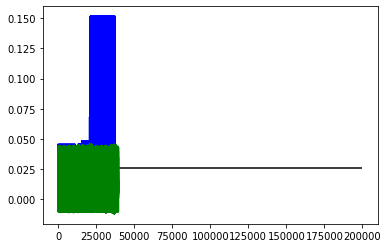

In [13]:
plt.plot(test_df.ravel(), color='b')
plt.plot(model.predict(test_df).ravel(), color='g')
plt.hlines(y=scores['thresholds'][999], xmin=0, xmax=200000, color='k')